# Predicting cheese fat level by manufacturer information, moisture percent, organic status, cheese category, and milk type <br><br> by Sabrina Knaudt

# Introduction

The goal of this project is to train a machine learning algorithm to predict cheese fat level using key features. We expect to be able to successfully train a model for this classification problem and answer the question “Can you use manufacturer information, moisture percent, organic status, cheese category, and milk type to predict cheese fat level?”

In [62]:
import pandas as pd
import numpy as np
import altair as alt

In [63]:
cheese_df = pd.read_csv("data/cheese_data.csv")
cheese_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


In [64]:
cheese_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


# Exploratory Data Analysis

In [65]:
from sklearn.model_selection import train_test_split 

In [66]:
train_df, test_df = train_test_split(cheese_df, test_size=0.2, random_state=42)

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 327 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              833 non-null    int64  
 1   ManufacturerProvCode  833 non-null    object 
 2   ManufacturingTypeEn   833 non-null    object 
 3   MoisturePercent       821 non-null    float64
 4   FlavourEn             643 non-null    object 
 5   CharacteristicsEn     521 non-null    object 
 6   Organic               833 non-null    int64  
 7   CategoryTypeEn        814 non-null    object 
 8   MilkTypeEn            832 non-null    object 
 9   MilkTreatmentTypeEn   782 non-null    object 
 10  RindTypeEn            574 non-null    object 
 11  CheeseName            833 non-null    object 
 12  FatLevel              833 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 91.1+ KB


In [68]:
# First visualization: Province bar chart value counts 

province_df = pd.DataFrame(train_df['ManufacturerProvCode'].value_counts().reset_index())
province_df = province_df.rename(columns= {'index' : 'Province', 'ManufacturerProvCode' : 'Count' })

province_chart = alt.Chart(province_df, height=500, width=300).mark_bar().encode(
    x=alt.X('Province:N', title='Provinces', sort=None),
    y=alt.Y('Count:Q', title='Count', scale=alt.Scale(domain=[0, 700]))
).properties(
    height=500,
    width=alt.Step(40),
    title="Count of cheeses by province"
)

province_chart

alt.Chart(...)

In [69]:
province_df

,Province,Count
0,QC,637
1,ON,90
2,BC,56
3,NB,19
4,AB,12
5,MB,9
6,NS,6
7,PE,2
8,NL,1
9,SK,1


In [70]:
train_df['CategoryTypeEn'].value_counts()

Firm Cheese         274
Soft Cheese         213
Semi-soft Cheese    180
Fresh Cheese        101
Hard Cheese          27
Veined Cheeses       19
Name: CategoryTypeEn, dtype: int64

In [71]:
# Second visualizer: Moisture percent by cheese category

moisture_df = train_df.dropna(subset=['CategoryTypeEn'])

moisture_chart = alt.Chart(moisture_df, height=500, width=500).mark_circle(size=20, opacity=0.6).encode(
    x=alt.X('CategoryTypeEn:N', title='Cheese category'),
    y=alt.Y('MoisturePercent:Q', title='Percent moisture')
).properties(title='Moisture percent by cheese category')

moisture_chart

alt.Chart(...)

In [72]:
train_df.describe()

,CheeseId,MoisturePercent,Organic
count,833.000000,821.000000,833.000000
mean,1563.859544,46.946407,0.099640
std,448.493012,9.720668,0.299699
min,228.000000,12.000000,0.000000
25%,1278.000000,40.000000,0.000000
50%,1556.000000,46.000000,0.000000
75%,1900.000000,52.000000,0.000000
max,2391.000000,92.000000,1.000000


We have limited numeric categories and the data does not appear to be skewed

# Preprocessing

In [75]:
X_train = train_df.drop(columns=['CheeseId', 'FlavourEn', 'CharacteristicsEn', 'RindTypeEn', 'CheeseName', 'FatLevel'])
y_train = train_df['FatLevel']

X_test = test_df.drop(columns=['CheeseId', 'FlavourEn', 'CharacteristicsEn', 'RindTypeEn', 'CheeseName', 'FatLevel'])
y_test = test_df['FatLevel']

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 327 to 860
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  833 non-null    object 
 1   ManufacturingTypeEn   833 non-null    object 
 2   MoisturePercent       821 non-null    float64
 3   Organic               833 non-null    int64  
 4   CategoryTypeEn        814 non-null    object 
 5   MilkTypeEn            832 non-null    object 
 6   MilkTreatmentTypeEn   782 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 52.1+ KB


Columns 2, 4, and 6 have a significant amount of null values and we need to impute/deal with those values. Column 5 only has one null value and I think we can just drop that row from the data set. 

In [77]:
X_train.head()

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn
327,QC,Industrial,57.0,0,Soft Cheese,Cow,Pasteurized
596,QC,Artisan,39.0,0,Firm Cheese,Ewe,Thermised
60,BC,Artisan,68.0,0,Soft Cheese,Cow,Pasteurized
342,QC,Industrial,45.0,0,Soft Cheese,Cow,Pasteurized
464,QC,Artisan,55.0,0,Soft Cheese,Goat,Pasteurized


In [78]:
X_train['ManufacturingTypeEn'].value_counts() #check if binary

Industrial    351
Artisan       301
Farmstead     181
Name: ManufacturingTypeEn, dtype: int64

In [79]:
X_train['MilkTreatmentTypeEn'].value_counts()

Pasteurized    629
Raw Milk        99
Thermised       54
Name: MilkTreatmentTypeEn, dtype: int64

At face value, milk treatment type does not seem like it will have much value on predicting cheese fat level. Additionally, the risk of imputing those values with the most frequent count and skewing the data, it does not seem like a feature worth keeping

In [80]:
# Cleaing the train dataframes
# Dropping null row and MilkTreatmentType column

X_train_clean = X_train.dropna(subset=['MilkTypeEn'])
X_train_clean = X_train.drop(columns=['MilkTreatmentTypeEn'])

X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 327 to 860
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  833 non-null    object 
 1   ManufacturingTypeEn   833 non-null    object 
 2   MoisturePercent       821 non-null    float64
 3   Organic               833 non-null    int64  
 4   CategoryTypeEn        814 non-null    object 
 5   MilkTypeEn            832 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 45.6+ KB


In [81]:
# Also have to drop the row on the y set
y_train_clean = y_train.dropna() 
y_train_clean

327     lower fat
596    higher fat
60      lower fat
342    higher fat
464     lower fat
          ...    
87     higher fat
330     lower fat
466     lower fat
121     lower fat
860     lower fat
Name: FatLevel, Length: 833, dtype: object

In [84]:
# Also have to clean test set
X_test_clean = X_test.dropna(subset=['MilkTypeEn'])
X_test_clean = X_test.drop(columns=['MilkTreatmentTypeEn'])

y_test_clean = y_test.dropna() 

In [82]:
# Feature types 

numeric_feat = ['MoisturePercent']
categorical_feat=['ManufacturerProvCode', 'ManufacturingTypeEn', 'CategoryTypeEn', 'MilkTypeEn']
binary_feat = ['Organic']

In [42]:
# Preprocessing
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore')   
)

binary_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, dtype=int, drop='if_binary')
)

In [43]:
# Preprocessing cont.
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feat),
    (categorical_transformer, categorical_feat),
    (binary_transformer, binary_feat),
)

# Methods & Results

In [44]:
# Baseline model 
from sklearn.dummy import DummyClassifier 
from sklearn.model_selection import cross_validate

dummy = DummyClassifier(strategy="most_frequent")

score = cross_validate(dummy, X_train_clean, y_train_clean, cv=5, return_train_score=True, n_jobs=-1)

score_df = pd.DataFrame(score)
score_df

,fit_time,score_time,test_score,train_score
0,0.002170,0.001040,0.652695,0.651652
1,0.001493,0.000699,0.652695,0.651652
2,0.001456,0.000789,0.652695,0.651652
3,0.001683,0.000816,0.650602,0.652174
4,0.001665,0.000769,0.650602,0.652174


In [45]:
score_df.mean()

fit_time       0.001693
score_time     0.000823
test_score     0.651858
train_score    0.651861
dtype: float64

Dummy model has an average test score of 0.65

In [47]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = make_pipeline(
    preprocessor, 
    KNeighborsClassifier()
)

score = cross_validate(knn_pipe, X_train_clean, y_train_clean, cv=5, return_train_score=True, n_jobs=-1)

score_df = pd.DataFrame(score)
score_df

,fit_time,score_time,test_score,train_score
0,0.022856,0.793340,0.766467,0.861862
1,0.021564,0.845022,0.832335,0.852853
2,0.021494,1.249293,0.808383,0.870871
3,0.021590,0.446469,0.807229,0.863568
4,0.021699,0.554175,0.843373,0.868066


In [48]:
score_df.mean()

fit_time       0.021840
score_time     0.777660
test_score     0.811558
train_score    0.863444
dtype: float64

Baseline KNN classifier has an average test score of 0.81

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 

lr_pipe = make_pipeline(
    preprocessor, 
    LogisticRegression()   
)

score = cross_validate(lr_pipe, X_train_clean, y_train_clean, cv=5, return_train_score=True, n_jobs=-1)
score_df = pd.DataFrame(score)
score_df

,fit_time,score_time,test_score,train_score
0,10.588192,0.016406,0.706587,0.815315
1,10.194440,0.108644,0.796407,0.788288
2,10.294986,0.110207,0.772455,0.800300
3,9.095870,0.778403,0.807229,0.805097
4,11.496826,0.198785,0.837349,0.803598


In [50]:
score_df.mean()

fit_time       10.334063
score_time      0.242489
test_score      0.784005
train_score     0.802520
dtype: float64

The baseline logistic regression model has an average test score of 0.80, much improved from the dummy model and comparable to KNN classifier. Logistic regression look like a promising model, let's see what happens when we try optimizing it's hyperparameters.

In [25]:
# Logistic Regression Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
import scipy

lr_pipe = make_pipeline(
    preprocessor, 
    LogisticRegression(max_iter=1000)   
)

param_grid = {
    "logisticregression__C" : scipy.stats.uniform(0, 100)
}

lr_random_search = RandomizedSearchCV(lr_pipe, param_grid, cv=5, n_iter=10, verbose=2, n_jobs=-1)
lr_random_search.fit(X_train_clean, y_train_clean)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............logisticregression__C=90.12698876606241; total time=  41.8s
[CV] END ............logisticregression__C=90.12698876606241; total time=  53.1s
[CV] END ............logisticregression__C=90.12698876606241; total time=  53.1s
[CV] END ............logisticregression__C=90.12698876606241; total time=  46.5s
[CV] END ............logisticregression__C=90.12698876606241; total time=  42.0s
[CV] END ............logisticregression__C=61.37553547254216; total time=  45.6s
[CV] END ............logisticregression__C=61.37553547254216; total time=  42.0s
[CV] END ............logisticregression__C=61.37553547254216; total time=  38.9s
[CV] END ............logisticregression__C=61.37553547254216; total time=  43.3s
[CV] END ............logisticregression__C=61.37553547254216; total time=  50.5s
[CV] END ............logisticregression__C=90.21056976794436; total time=  46.4s
[CV] END ............logisticregression__C=90.21

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                 

In [51]:
lr_random_search.best_params_

{'logisticregression__C': 90.12698876606241}

In [52]:
lr_random_search.best_score_

0.7803982396652478

In [86]:
lr_random_search.score(X_test_clean, y_test_clean)

0.784688995215311

An okay score, around what our baseline models were scoring (about 0.80). Let's see if we can get a better score. 

In [56]:
# KNN classifier hyperparamter tuning

knn_pipe = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

param_grid = {
    "kneighborsclassifier__n_neighbors" : range(1, 11)
}

knn_random_search = RandomizedSearchCV(knn_pipe, param_grid, cv=5, n_iter=10, verbose=2, n_jobs=-1)
knn_random_search.fit(X_train_clean, y_train_clean)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................kneighborsclassifier__n_neighbors=1; total time=   0.4s
[CV] END ................kneighborsclassifier__n_neighbors=1; total time=   1.0s
[CV] END ................kneighborsclassifier__n_neighbors=1; total time=   1.2s
[CV] END ................kneighborsclassifier__n_neighbors=1; total time=   0.9s
[CV] END ................kneighborsclassifier__n_neighbors=1; total time=   0.8s
[CV] END ................kneighborsclassifier__n_neighbors=2; total time=   0.9s
[CV] END ................kneighborsclassifier__n_neighbors=2; total time=   1.1s
[CV] END ................kneighborsclassifier__n_neighbors=2; total time=   0.9s
[CV] END ................kneighborsclassifier__n_neighbors=2; total time=   1.1s
[CV] END ................kneighborsclassifier__n_neighbors=2; total time=   0.7s
[CV] END ................kneighborsclassifier__n_neighbors=3; total time=   0.6s
[CV] END ................kneighborsclassifier__n

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['MoisturePercent']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                 

In [57]:
knn_random_search.best_params_

{'kneighborsclassifier__n_neighbors': 4}

In [58]:
knn_random_search.best_score_

0.8234831541735806

In [85]:
knn_random_search.score(X_test_clean, y_test_clean)

0.8516746411483254

This is our best score yet! I beleive the nearest neighbor classifer works best (out of the models we've tested) because cheeses with similar specifications (manufacture information, organic status, category, milk type) are likely to be similar in fat level, and this is what our model is capturing.

In [87]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

confusion_matrix(y_test_clean, knn_random_search.predict(X_test_clean))

array([[ 52,  16],
       [ 15, 126]])

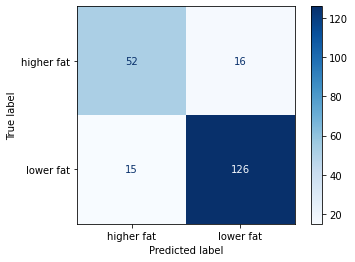

In [89]:
# Plot confusion matrix

plot_confusion_matrix(knn_random_search, X_test_clean, y_test_clean, cmap='Blues')

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test_clean, knn_random_search.predict(X_test_clean)))

              precision    recall  f1-score   support

  higher fat       0.78      0.76      0.77        68
   lower fat       0.89      0.89      0.89       141

    accuracy                           0.85       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.85      0.85      0.85       209



# Discussion 

In conclusion, our analysis aimed to develop a predictive model for classifying cheese types based on various features such as manufacturing type, moisture percent, organic status, milk type, and milk treatment type. We utilized a K-Nearest Neighbors (KNN) classifier with hyperparameter tuning to achieve this goal. <br>

The results of our model tuning revealed that the optimal number of neighbors for the KNN classifier is around 4 based on the randomized search conducted. This indicates that the model performs well when considering the characteristics of a few nearby data points to make predictions about cheese types. <br>

Interpreting these results in the context of the project's goals, we can see that the KNN classifier offers a reasonable approach for classifying cheese types based on their attributes. By leveraging the features provided in the dataset, we can make accurate predictions about the category of cheese, which could be valuable for producers, distributors, and consumers alike.<br>

Exploring alternative models such as decision trees, random forests, or further tuning a logistic regression model are further avenue of exploration.

# References

All code was learnt from UBC Extended Learning - Introduction to Machine Learning. <br> <br>
UBC Extended Learning. (n.d). <i> Introduction to Machine Learning</i>. https://ml-learn.mds.ubc.ca/en